In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [3]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 1s 10us/step - loss: 2.0951 - acc: 0.2311
Epoch 2/10
60000/60000 [==============================] - 0s 5us/step - loss: 1.8400 - acc: 0.5161
Epoch 3/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.6508 - acc: 0.6230
Epoch 4/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.4909 - acc: 0.6729
Epoch 5/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.3576 - acc: 0.6991
Epoch 6/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.2411 - acc: 0.7192
Epoch 7/10
60000/60000 [==============================] - 0s 7us/step - loss: 1.1410 - acc: 0.7316
Epoch 8/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.0569 - acc: 0.7387
Epoch 9/10
60000/60000 [==============================] - 0s 5us/step - loss: 0.9886 - acc: 0.7476
Epoch 10/10
60000/60000 [==============================] - 0

In [6]:
model.evaluate(X_test.reshape(-1, 784), y_test)

10000/10000 [==============================] - 0s 18us/step


[0.9263886801719665, 0.7476]

In [7]:
model.predict(X_test.reshape(-1, 784))

array([[0.01098019, 0.012068  , 0.01690653, ..., 0.14764133, 0.05332631,
        0.4026239 ],
       [0.05772859, 0.0102776 , 0.41431224, ..., 0.00743914, 0.02765957,
        0.01471874],
       [0.01195067, 0.48652163, 0.00730124, ..., 0.0112496 , 0.00416857,
        0.0156377 ],
       ...,
       [0.12932712, 0.00884417, 0.00967699, ..., 0.01616725, 0.13123533,
        0.01609591],
       [0.0208447 , 0.41245338, 0.00589588, ..., 0.0129827 , 0.00802723,
        0.03029954],
       [0.01278108, 0.01281354, 0.01272839, ..., 0.28359863, 0.067599  ,
        0.11615309]], dtype=float32)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


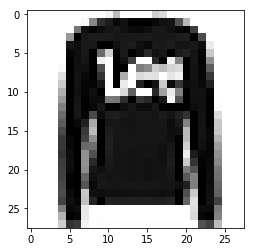

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1], cmap="gray_r")
plt.show()

In [9]:
pred = model.predict(X_test.reshape(-1, 784))

In [17]:
import numpy as np

np.argmax(pred[1])

2

In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)